In [11]:
#Packages
import openpyxl
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
#Helper functions
def plot_scatter(dataframe, guide, title, xlabel, ylabel, legend_label):
    """Plots a dataframe into a scatter plot both one of the dimensions of the colous measurement"""
    i = 0 #Counter used for the fiber number in the legend
    if guide == 'x': #Guide selector using strings
        for index, row in dataframe.iterrows():
            if index % 2 != 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(dataframe.shape[1]))), dataframe.iloc[index], label=legend_label + f'{i}')
    elif guide == 'y':
        for index, row in dataframe.iterrows():
            if index % 2 == 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(dataframe.shape[1]))), dataframe.iloc[index], label=legend_label + f'{i}')
    else: 
        raise Exception('Select the fiber x or y')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def RyR(dataframe):
    """Calculates and prints the RyR values for both fibers, including a cualitative evaluation"""
    i = 0; df_RyR = [] #Preallocate a counter and an empty dataframe where to add the rows
    std = dataframe.iloc[:, :-2].std(axis=1) #Standard deviation for each row, excluding limits
    for index, _ in enumerate(range(dataframe.shape[0])):
        i+= 1
        RyR = (6*std.iloc[index]/(dataframe.iloc[index,-1]-dataframe.iloc[index,-2]))*100 #Calculates RyR for the whole dataframe
        df_RyR.append(float(RyR)) #Adds the values of RyR to a ndarray
    df_RyR = pd.DataFrame(df_RyR) #Builds a new dataframe with the RyR values
    x_fiber = df_RyR[df_RyR.index % 2 != 0] #Indexes the fiber x RyR values in a new dataframe
    y_fiber = df_RyR[df_RyR.index % 2 == 0] #Indexes the fiber y RyR values in a new dataframe
    dfx = pd.DataFrame(x_fiber).reset_index(drop=True) #Resets row index
    dfy = pd.DataFrame(y_fiber).reset_index(drop=True) #Resets row index
    for i, _ in enumerate(range(dfx.shape[0])): #Prints the dataframe for fiber x row by row indexing with the counter
        Pass = "Correcto" if dfx.iloc[i, 0] <= 10 else ("Fallo ligero" if 10 <= dfx.iloc[i, 0] <= 25 else "Fallo considerable")
        print(f'RyR Guía fbx {dfx.index[i]+1}: ' + str(dfx.iloc[i, 0]) +' %' + ' Estatus: ' + Pass)
    print("")
    for i, _ in enumerate(range(dfy.shape[0])): #Prints the dataframe for fiber y row by row
        Pass = "Correcto" if dfy.iloc[i, 0] <= 10 else ("Fallo ligero" if 10 <= dfy.iloc[i, 0] <= 25 else "Fallo considerable")
        print(f'RyR Guía fby {dfy.index[i]+1}: ' + str(dfy.iloc[i, 0]) +' %' + ' Estatus: ' + Pass)
    return dfx, dfy

def z_score_filter(dataframe, threshold):
    """Applies a z-score to a Dataframe, filtering values that don't apply."""
    rows = []
    MEAS = dataframe.iloc[:, :-2] #Indexes the measurements
    limits = dataframe.iloc[:, -2:]  #Indexes the limits  
    for row in range(MEAS.shape[0]): #Iterates over the rows
        row = MEAS.iloc[row, :]
        z_scores = (row - row.mean()) / row.std() #Calculates the z-score
        filtered_row = np.where(abs(z_scores) <= threshold, row, np.nan) #Applies the threshold as a filter
        rows.append(filtered_row)
    filtered_df = pd.DataFrame(rows) #Builds a new dataframe
    filtered_df = pd.concat([filtered_df, limits], axis=1) #Adds again the columns
    return filtered_df

Data Extraction and visualization

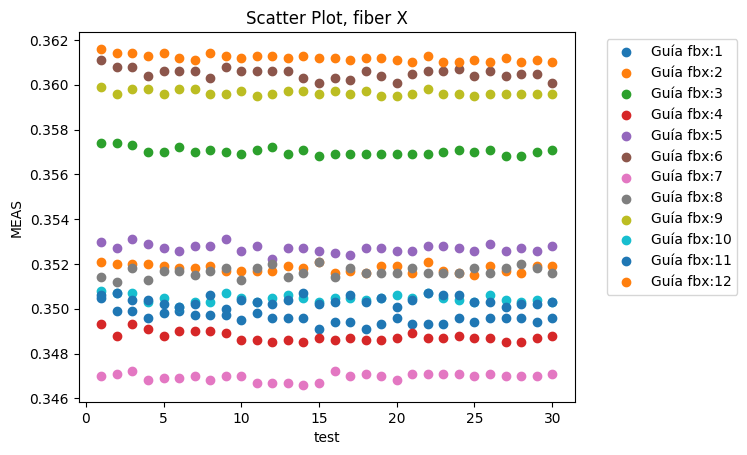

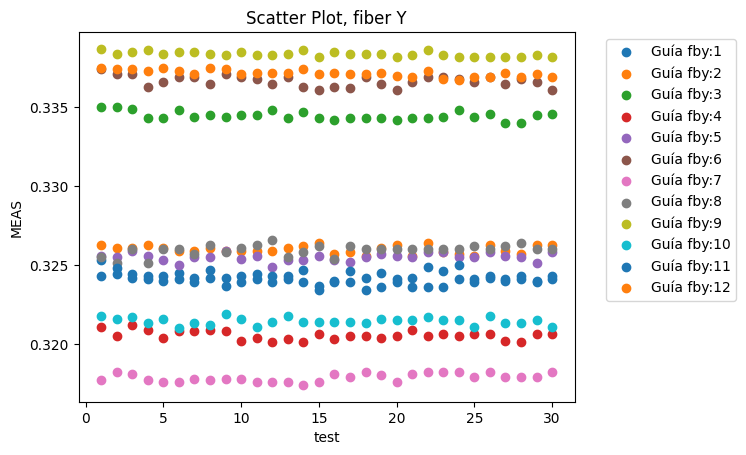

In [12]:
#Import the data from a prepocessed working sheet
data = pd.read_excel("./2_Results/Target.xlsx", header=None)
#Slice the measure from the data
df = data.iloc[3:, 1:-2] #Slices the dataframe, deleting the first empty rows and the columns for tags and df_plus_limits
df = df.reset_index(drop=True) #Resets the rows index to start in zero again
df.columns = range(df.shape[1]) #Resets the columns index to start in zero again
#Plot the measures for each scale
plot_scatter(df, 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guía fbx:')
plot_scatter(df, 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Guía fby:')

RyR calculation

In [13]:
#Slice the dataframe to obtain only the measures and limits for each fiber
df_plus_limits = pd.concat([df, data.iloc[3:, -2:].reset_index(drop=True)], axis=1) #Reset the index to avoid index mismatching
df_plus_limits = df_plus_limits.reset_index(drop=True) #Resets the rows index to start in zero again
df_plus_limits.columns = range(df_plus_limits.shape[1]) #Resets the columns index to start in zero again
#Generate a RyR for each fiber in every scale
RyRx, RyRy = RyR(df_plus_limits)

RyR Guía fbx 1: 5.016927742985813 % Estatus: Correcto
RyR Guía fbx 2: 3.0703724908924808 % Estatus: Correcto
RyR Guía fbx 3: 2.5358260196754747 % Estatus: Correcto
RyR Guía fbx 4: 3.9513523182532593 % Estatus: Correcto
RyR Guía fbx 5: 3.388075244367926 % Estatus: Correcto
RyR Guía fbx 6: 3.5993599583869176 % Estatus: Correcto
RyR Guía fbx 7: 2.966517821483812 % Estatus: Correcto
RyR Guía fbx 8: 3.8716954488095707 % Estatus: Correcto
RyR Guía fbx 9: 1.6447277676702603 % Estatus: Correcto
RyR Guía fbx 10: 2.9562530231568975 % Estatus: Correcto
RyR Guía fbx 11: 3.651483716701151 % Estatus: Correcto
RyR Guía fbx 12: 2.3993742617267664 % Estatus: Correcto

RyR Guía fby 1: 9.149426211517149 % Estatus: Correcto
RyR Guía fby 2: 6.075933304212658 % Estatus: Correcto
RyR Guía fby 3: 5.473518788659151 % Estatus: Correcto
RyR Guía fby 4: 6.839237707068918 % Estatus: Correcto
RyR Guía fby 5: 5.99530851065486 % Estatus: Correcto
RyR Guía fby 6: 6.982461349201227 % Estatus: Correcto
RyR Guía fby 7: 5

Distribution Fitting

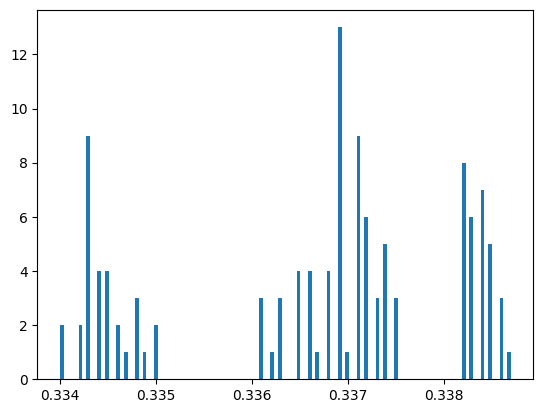

In [102]:
array = df.values
fbx_low = array[0::6].reshape(-1, 1)
fby_low = array[1::6].reshape(-1, 1)
fbx_medium = array[2::6].reshape(-1, 1)
fby_medium = array[2::6].reshape(-1, 1)
fbx_high = array[4::6].reshape(-1, 1)
fby_high = array[5::6].reshape(-1, 1)
values = np.concatenate([[fbx_low], [fby_low], [fbx_medium], [fby_medium], [fbx_high], [fby_high]]).reshape(6, 120)
plt.hist(values[np.random.randint(1, 6), :], 120)
plt.show()

Filtering

![title](./3_Extra/Z-score.jpg)

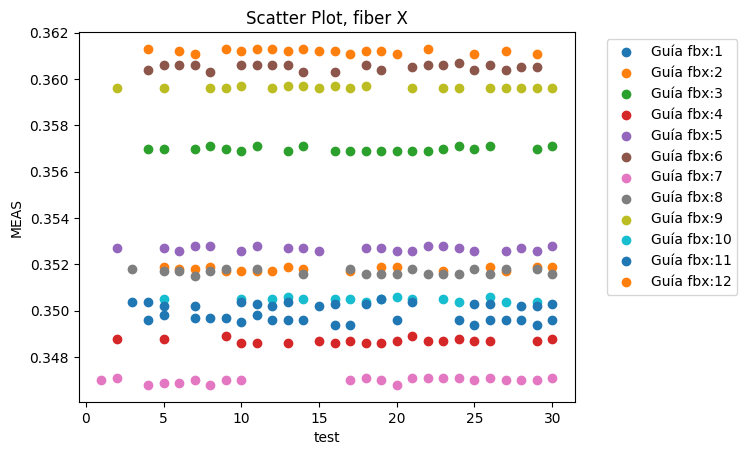

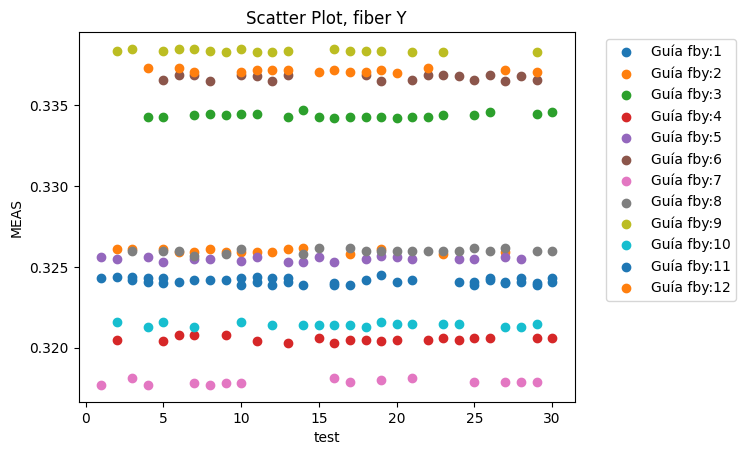

In [ ]:
#Filter values by their row z-score
z_df = z_score_filter(df_plus_limits, 1)
#Plot the filtered values
plot_scatter(z_df.iloc[:, :-2], 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guía fbx:')
plot_scatter(z_df.iloc[:, :-2], 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Guía fby:')

In [ ]:
#Split the dataframe for x fiber and y fiber
x_fiber = z_df[z_df.index % 2 == 0]
y_fiber = z_df[z_df.index % 2 != 0]
#Calculate the new RyR
RyRx, RyRy = RyR(z_df)

RyR Guía fbx 1: 2.199292068470313 % Estatus: Correcto
RyR Guía fbx 2: 1.7047187473802388 % Estatus: Correcto
RyR Guía fbx 3: 1.3161311928103792 % Estatus: Correcto
RyR Guía fbx 4: 1.7598291664488748 % Estatus: Correcto
RyR Guía fbx 5: 1.474867869704265 % Estatus: Correcto
RyR Guía fbx 6: 1.905698526179719 % Estatus: Correcto
RyR Guía fbx 7: 1.8181818181819867 % Estatus: Correcto
RyR Guía fbx 8: 1.8439729194075634 % Estatus: Correcto
RyR Guía fbx 9: 0.7014657762939744 % Estatus: Correcto
RyR Guía fbx 10: 1.2364973189761295 % Estatus: Correcto
RyR Guía fbx 11: 1.7047187473802385 % Estatus: Correcto
RyR Guía fbx 12: 1.2313634776119873 % Estatus: Correcto

RyR Guía fby 1: 4.358958531635491 % Estatus: Correcto
RyR Guía fby 2: 3.063331519767239 % Estatus: Correcto
RyR Guía fby 3: 2.7764760261529737 % Estatus: Correcto
RyR Guía fby 4: 3.516936465912062 % Estatus: Correcto
RyR Guía fby 5: 2.858339598990768 % Estatus: Correcto
RyR Guía fby 6: 3.5307735838274623 % Estatus: Correcto
RyR Guía fby 

In [44]:
np.random.uniform(1, 10)

4.606770669755887